# Strategy Learner


---

This notebook provides an example of how a StrategyLearner works. This code is also available in the `__main__` function of `StrategyLearner.py`.

## Summary

We choose a stock, an in-sample period and an out-of-sample period. We train a StrategyLearner on the data from the in-sample period and test it on the out-of-sample period. Then we report the performances of the portfolio (only consisting of the stock) and benchmark for both periods. Benchmark is The performance of a portfolio starting with ``$``100,000 cash, investing in 1000 shares of JPM and holding that position.

* In this notebook, we choose the symbol JPM (JPMorgan Chase & Co.)
* The in sample/development period is January 1, 2008 to December 31 2009.
* The out of sample/testing period is January 1, 2010 to December 31 2011.
* Starting cash is ``$``100,000.
* Allowable positions are: 1000 shares long, 1000 shares short, 0 shares.
* There is no limit on leverage.
* Transaction costs: Commission: $0.00, Impact: 0.0.

__*The performance of portfolio is better than benchmark in both periods!*__

## Table of contents:
[1) In-sample performance](#first)

[2) Out-of-sample performance](#second)

Import relevant libraries and modules

In [5]:
import datetime as dt

from util import create_df_benchmark
from StrategyLearner import StrategyLearner
from marketsim import compute_portvals_single_symbol, market_simulator

Starting cash, symbol of interest, commission, and impact

In [2]:
start_val = 100000
symbol = "JPM"
commission = 0.00
impact = 0.0
num_shares = 1000

---
## 1) In-sample performance <a class="anchor" id="first"></a>

Show the performances of portfolio and benchmark in the in-sample period

Specify the start and end dates for this period

In [3]:
start_date = dt.datetime(2008, 1, 1)
end_date = dt.datetime(2009, 12, 31)

Get a dataframe of benchmark data. Benchmark is a portfolio starting with ``$``100,000, investing in 1000 shares of symbol and holding that position

In [6]:
df_benchmark_trades = create_df_benchmark(symbol, start_date, end_date, 
                                              num_shares)
print (df_benchmark_trades)

            Shares
Date              
2008-01-02    1000
2009-12-31   -1000


Create an instance of StrategyLearner and retrieve a trades dataframe via test_policy

1 -0.5893999999999999
2 -0.0928
3 0.3097000000000001
4 0.2811999999999999
5 0.3621000000000001
6 0.3447
7 0.3447
8 0.3447
9 0.3447
10 0.3447
11 0.3447
12 0.3447
13 0.3447
14 0.3447
15 0.3447
16 0.3447
17 0.3447
18 0.3447
19 0.3447
20 0.3447
21 0.3447


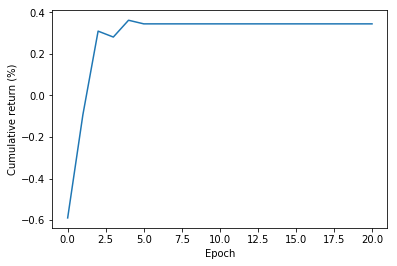

            Shares
Date              
2008-01-16   -1000
2008-01-22    1000
2008-01-30    1000
2008-01-31   -1000
2008-02-06   -1000
2008-02-25    1000
2008-02-28   -1000
2008-03-17    1000
2008-03-25    1000
2008-03-26   -1000
2008-04-04   -1000
2008-04-21    1000
2008-04-23   -1000
2008-04-24    1000
2008-05-08   -1000
2008-05-13    1000
2008-05-14   -1000
2008-06-23    1000
2008-06-24   -1000
2008-07-16    1000
2008-07-23    1000
2008-07-24   -1000
2008-07-31   -1000
2008-08-01    1000
2008-08-11   -1000
2008-08-26    1000
2008-09-22   -1000
2008-09-23    1000
2008-10-02    1000
2008-10-03   -1000
...            ...
2009-04-16    1000
2009-04-17   -1000
2009-04-27   -1000
2009-04-28    1000
2009-04-30   -1000
2009-05-01    1000
2009-05-22   -1000
2009-05-27    1000
2009-06-02   -1000
2009-06-04    1000
2009-06-09   -1000
2009-06-17    1000
2009-06-18   -1000
2009-06-19    1000
2009-06-22   -1000
2009-06-29    1000
2009-07-02   -1000
2009-07-09    1000
2009-09-01   -1000
2009-09-10  

In [9]:
# Train and test a StrategyLearner
# Set verbose to True will print out and plot the cumulative return for each training epoch
stl = StrategyLearner(num_shares=num_shares, impact=impact, 
                      commission=commission, verbose=True,
                      num_states=3000, num_actions=3)
stl.add_evidence(symbol=symbol, start_val=start_val, 
                 start_date=start_date, end_date=end_date)
df_trades = stl.test_policy(symbol=symbol, start_date=start_date,
                            end_date=end_date)
print (df_trades)

Retrieve performance stats via a market simulator

Performances during training period for JPM
Date Range: 2008-01-01 00:00:00 to 2009-12-31 00:00:00
Sharpe Ratio of Portfolio: 1.12511257551527
Sharpe Ratio of Benchmark : 0.15691840642403027

Cumulative Return of Portfolio: 0.3447
Cumulative Return of Benchmark : 0.012299999999999978

Standard Deviation of Portfolio: 0.009055938131234257
Standard Deviation of Benchmark : 0.017004366271213767

Average Daily Return of Portfolio: 0.0006418435116413186
Average Daily Return of Benchmark : 0.00016808697819094035

Final Portfolio Value: 134470.0
Final Benchmark Value: 101230.0


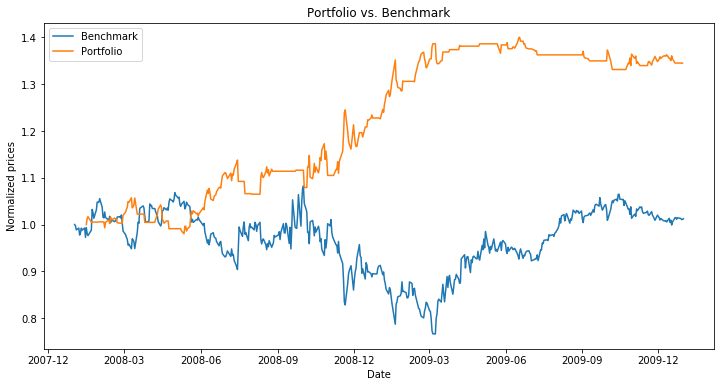

In [12]:
# Retrieve performance stats via a market simulator
print ("Performances during training period for {}".format(symbol))
print ("Date Range: {} to {}".format(start_date, end_date))
market_simulator(df_trades, df_benchmark_trades, symbol=symbol, 
                 start_val=start_val, commission=commission, impact=impact)

---
## 2) Out-of-sample performance <a class="anchor" id="second"></a>

Show the performances of portfolio and benchmark in the out-of-sample period

Specify the start and end dates for this period

In [13]:
start_date = dt.datetime(2010, 1, 1)
end_date = dt.datetime(2011, 12, 31)

Get a dataframe of benchmark data. Benchmark is a portfolio starting with ``$``100,000, investing in 1000 shares of symbol and holding that position.

In [14]:
df_benchmark_trades = create_df_benchmark(symbol, start_date, end_date, 
                                          num_shares)

Use the same StrategyLearner trained above and retrieve a trades dataframe via test_policy

In [15]:
df_trades = stl.test_policy(symbol=symbol, start_date=start_date, 
                            end_date=end_date)
print (df_trades)

            Shares
Date              
2010-01-19   -1000
2010-02-09    1000
2010-02-10   -1000
2010-02-18    1000
2010-04-05   -1000
2010-04-07    1000
2010-04-09   -1000
2010-04-14    1000
2010-04-20   -1000
2010-06-02    1000
2010-06-03   -1000
2010-06-17    1000
2010-06-30   -1000
2010-07-13    1000
2010-07-14    1000
2010-07-15   -1000
2010-07-21   -1000
2010-07-23    1000
2010-07-27   -1000
2010-07-30    1000
2010-08-06   -1000
2010-08-27    1000
2010-08-31   -1000
2010-09-02    1000
2010-09-08    1000
2010-09-09   -1000
2010-09-14    1000
2010-09-15   -1000
2010-09-24   -1000
2010-10-07    1000
...            ...
2011-08-03   -1000
2011-08-24    1000
2011-08-29   -1000
2011-08-30    1000
2011-08-31   -1000
2011-09-01    1000
2011-09-02   -1000
2011-09-26    1000
2011-09-27   -1000
2011-10-05    1000
2011-10-10   -1000
2011-10-12    1000
2011-10-13   -1000
2011-10-18    1000
2011-10-20   -1000
2011-10-21    1000
2011-10-25   -1000
2011-10-27    1000
2011-10-31   -1000
2011-12-02  

Retrieve performance stats via a market simulator


Performances during testing period for JPM
Date Range: 2010-01-01 00:00:00 to 2011-12-31 00:00:00
Sharpe Ratio of Portfolio: 0.3228723006593053
Sharpe Ratio of Benchmark : -0.2568129607376273

Cumulative Return of Portfolio: 0.05620000000000003
Cumulative Return of Benchmark : -0.08340000000000003

Standard Deviation of Portfolio: 0.0065329616932926346
Standard Deviation of Benchmark : 0.008481007498803986

Average Daily Return of Portfolio: 0.00013287418985118472
Average Daily Return of Benchmark : -0.00013720316019481813

Final Portfolio Value: 105620.0
Final Benchmark Value: 91660.0


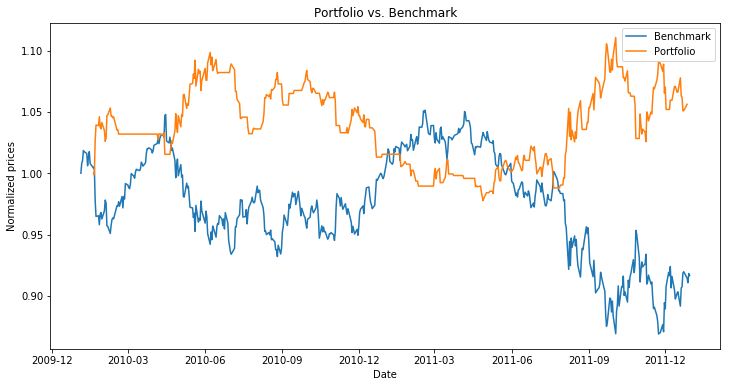

In [16]:
print ("\nPerformances during testing period for {}".format(symbol))
print ("Date Range: {} to {}".format(start_date, end_date))
market_simulator(df_trades, df_benchmark_trades, symbol=symbol, 
                 start_val=start_val, commission=commission, impact=impact)